<a href="https://colab.research.google.com/github/Narawit007/BSC_DPDM2025/blob/main/Ch3_3_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import data

In [158]:
import pandas as pd

In [159]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
flood = pd.read_csv('/content/drive/MyDrive/BSC_data 2026/flooding database.csv')
flood.head()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0


# Data Cleaning

## Missing Data

### Check Missing

In [89]:
flood.shape

(913, 24)

In [90]:
flood.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,275
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


### Drop Record ที่มี missing ออก

In [91]:
flood_drop = flood.dropna()
flood_drop.shape

(12, 24)

Drop ถ้ามี missing

Drob เฉพาะเกิด missing ในตัวแปรที่เราจะใช้

-dfo_country

-dfo_other_country

-dfo_began

-dfo_ended

-dfo_dead

-dfo_cause

-dfo_severity

In [92]:
flood_drop2 = flood.dropna(subset=['dfo_country','dfo_other_country','dfo_began','dfo_ended','dfo_dead','dfo_cause','dfo_severity'])
flood_drop2.shape

(637, 24)

### เติม Dummy

In [93]:
flood[flood.isnull()['dfo_other_country']]

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000,gfd_area_bin
172,DFO_2415_From_20040110_to_20040119,2415,std,0,Iran,NaN,51.439491,29.466641,1/10/04,1/19/04,...,1.0,7017.61,23986.0,23986.0,116060,1,0,-92074,NaN,4927.381000
383,DFO_3089_From_20070530_to_20070603,3089,std,0,Dominican Republic,NaN,-71.053795,19.547861,5/30/07,6/3/07,...,1.0,100.92,13819.0,13819.0,11672,1,0,2147,NaN,1642.460333
387,DFO_3097_From_20070611_to_20070624,3097,std,LS-2007-000080-BGD,Bangladesh,NaN,91.953546,22.397464,6/11/07,6/24/07,...,1.0,20493.38,4536692.0,4536692.0,8995159,1,0,-4458467,NaN,11497.222333
412,DFO_3136_From_20070721_to_20071015,3136,std,0,Bangladesh,NaN,91.233643,23.916419,7/21/07,10/15/07,...,1.0,78785.53,27712991.0,27712998.0,55288622,0,-7,-27575631,NaN,39419.048000
428,DFO_3166_From_20070726_to_20071010,3166,std,FL-2007-000132-BFA,Ghana,NaN,0.612005,13.037658,7/26/07,10/10/07,...,1.5,7621.96,325408.0,325408.0,624312,1,0,-298904,NaN,4927.381000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,DFO_4683_From_20180901_to_20181002,4683,std,NaN,Ghana,NaN,-1.066060,9.537550,9/1/18,10/2/18,...,1.5,1866.91,79032.0,38895.0,79032,1,40137,0,NaN,1642.460333
909,DFO_4695_From_20181023_to_20181027,4695,std,NaN,Mexico,NaN,-105.236000,23.721800,10/23/18,10/27/18,...,1.5,2720.37,23128.0,15725.0,23128,1,7403,0,NaN,1642.460333
910,DFO_4703_From_20181029_to_20181107,4703,otsu,NaN,Paraguay,NaN,-57.085300,-25.342700,10/29/18,11/7/18,...,1.0,10019.87,29435.0,25393.0,29435,1,4042,0,NaN,6569.841333
911,DFO_4704_From_20181124_to_20181129,4704,std,NaN,Vietnam,NaN,107.137000,11.491000,11/24/18,11/29/18,...,1.0,6467.41,218916.0,173753.0,218915,0,45163,1,NaN,3284.920667


In [94]:
flood_filldummy = flood.fillna(value={'dfo_other_country':'Unknown'})
flood_filldummy.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,0
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


### เติม missing ด้วยค่ากลาง

In [95]:
flood.groupby('dfo_cause').count()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000,gfd_area_bin
dfo_cause,,,,,,,,,,,,,,,,,,,,,
Dam,13,13,13,11,13,10,13,13,13,13,...,13,13,13,13,13,13,13,13,0,13
Heavy rain,749,749,749,554,749,530,749,749,749,748,...,749,749,748,748,749,749,749,749,16,749
"Snowmelt, Ice, Rain",52,52,52,45,52,45,52,52,52,52,...,52,52,52,52,52,52,52,52,7,51
"Tropical Storm, Surge",97,97,97,71,97,53,97,97,97,97,...,97,97,97,97,97,97,97,97,1,97


In [96]:
flood_fillmode = flood.fillna(value={'dfo_cause':'Heavy rain'})
flood_fillmode.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,275
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


### เติมด้วยตัวแทนของกลุ่ม

In [97]:
flood.groupby(['dfo_severity', 'dfo_cause']).count()

system:index  index  threshold_type  \
dfo_severity dfo_cause                                                    
1.0          Dam                               9      9               9   
             Heavy rain                      464    464             464   
             Snowmelt, Ice, Rain              34     34              34   
             Tropical Storm, Surge            33     33              33   
1.5          Dam                               3      3               3   
             Heavy rain                      163    163             163   
             Snowmelt, Ice, Rain               8      8               8   
             Tropical Storm, Surge            26     26              26   
2.0          Dam                               1      1               1   
             Heavy rain                      122    122             122   
             Snowmelt, Ice, Rain              10     10              10   
             Tropical Storm, Surge            38     38              38   

                                    glide_index  dfo_country  \
dfo_severity dfo_cause                                         
1.0          Dam                              9            9   
             Heavy rain                     390          464   
             Snowmelt, Ice, Rain             29           34   
             Tropical Storm, Surge           32           33   
1.5          Dam                              1            3   
             Heavy rain                      72          163   
             Snowmelt, Ice, Rain              7            8   
             Tropical Storm, Surge           12           26   
2.0          Dam                              1            1   
             Heavy rain                      92          122   
             Snowmelt, Ice, Rain              9           10   
             Tropical Storm, Surge           27           38   

                                    dfo_other_country  dfo_centroid_x  \
dfo_severity dfo_cause                                                  
1.0          Dam                                    9               9   
             Heavy rain                           369             464   
             Snowmelt, Ice, Rain                   30              34   
             Tropical Storm, Surge                 28              33   
1.5          Dam                                    0               3   
             Heavy rain                            67             163   
             Snowmelt, Ice, Rain                    6               8   
             Tropical Storm, Surge                  7              26   
2.0          Dam                                    1               1   
             Heavy rain                            94             122   
             Snowmelt, Ice, Rain                    9              10   
             Tropical Storm, Surge                 18              38   

                                    dfo_centroid_y  dfo_began  dfo_ended  ...  \
dfo_severity dfo_cause                                                    ...   
1.0          Dam                                 9          9          9  ...   
             Heavy rain                        464        464        463  ...   
             Snowmelt, Ice, Rain                34         34         34  ...   
             Tropical Storm, Surge              33         33         33  ...   
1.5          Dam                                 3          3          3  ...   
             Heavy rain                        163        163        163  ...   
             Snowmelt, Ice, Rain                 8          8          8  ...   
             Tropical Storm, Surge              26         26         26  ...   
2.0          Dam                                 1          1          1  ...   
             Heavy rain                        122        122        122  ...   
             Snowmelt, Ice, Rain                10         10         10  ...   
            

In [98]:
flood_sever1 = flood[flood['dfo_severity'] == 1.0]
flood_sever15 = flood[flood['dfo_severity'] == 1.5]
flood_sever2 = flood[flood['dfo_severity'] == 2.0]

In [99]:
flood_sever1 = flood_sever1.fillna(value={'dfo_cause':'Heavy rain'})
flood_sever15 = flood_sever15.fillna(value={'dfo_cause':'Heavy rain'})
flood_sever2 = flood_sever2.fillna(value={'dfo_cause':'Tropical Strom,Surge'})

In [100]:
flood_fillgroup = pd.concat([flood_sever1,flood_sever15,flood_sever2])

In [101]:
flood_fillgroup.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,275
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


## Noisy Data

Explor data

In [102]:
flood["gfd_area"]

,gfd_area
0,316.73
1,228.50
2,89.10
3,4322.47
4,740.33
...,...
908,1866.91
909,2720.37
910,10019.87
911,6467.41


plot data

In [103]:
from matplotlib import pyplot as plt

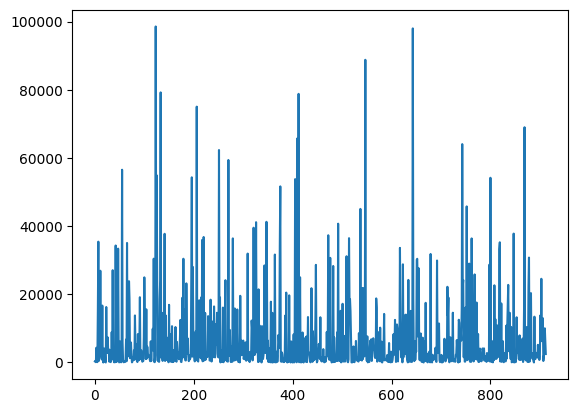

In [104]:
plt.plot(flood["gfd_area"])

ใช้ histogram ดู Bin ที่เหมาะสม

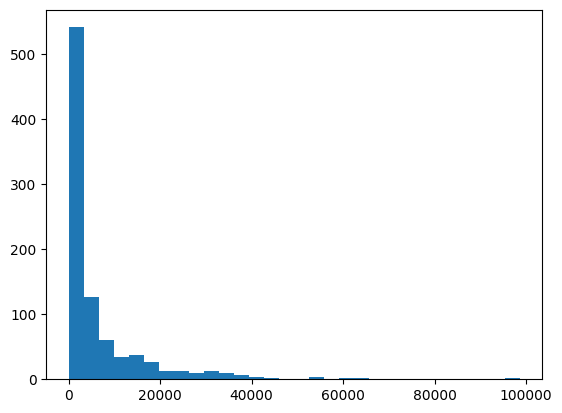

In [105]:
outputhist = plt.hist(flood["gfd_area"],30);

In [106]:
outputhist[1]

array([    0.        ,  3284.92066667,  6569.84133333,  9854.762     ,
       13139.68266667, 16424.60333333, 19709.524     , 22994.44466667,
       26279.36533333, 29564.286     , 32849.20666667, 36134.12733333,
       39419.048     , 42703.96866667, 45988.88933333, 49273.81      ,
       52558.73066667, 55843.65133333, 59128.572     , 62413.49266667,
       65698.41333333, 68983.334     , 72268.25466667, 75553.17533333,
       78838.096     , 82123.01666667, 85407.93733333, 88692.858     ,
       91977.77866667, 95262.69933333, 98547.62      ])

In [107]:
def put_value_into_bins(value,bin_edges):
    for i in range(len(bin_edges) - 1):
        if value >= bin_edges[i] and value < bin_edges[i+1]:
            new_val = (bin_edges[i] + bin_edges[i+1] - bin_edges[i])/2
            return new_val

In [108]:
put_value_into_bins(3000,outputhist[1])

np.float64(1642.4603333333332)

In [109]:
flood["gfd_area_bin"] = flood["gfd_area"].apply(lambda x: put_value_into_bins(x,outputhist[1]))

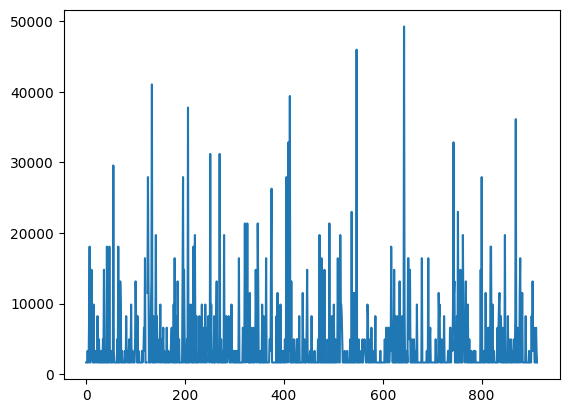

In [110]:
plt.plot(flood['gfd_area_bin']);

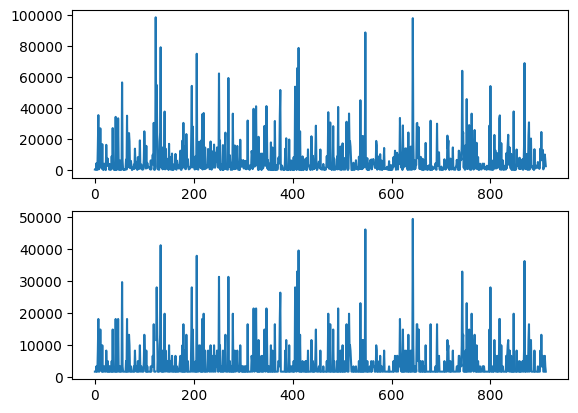

In [111]:
plt.subplot(2,1,1);
plt.plot(flood['gfd_area']);
plt.subplot(2,1,2);
plt.plot(flood['gfd_area_bin']);

In [112]:
flood['gfd_area_bin'].sort_values()

,gfd_area_bin
907,1642.460333
908,1642.460333
909,1642.460333
912,1642.460333
529,1642.460333
...,...
412,39419.048000
133,41061.508333
547,45988.889333
643,49273.810000


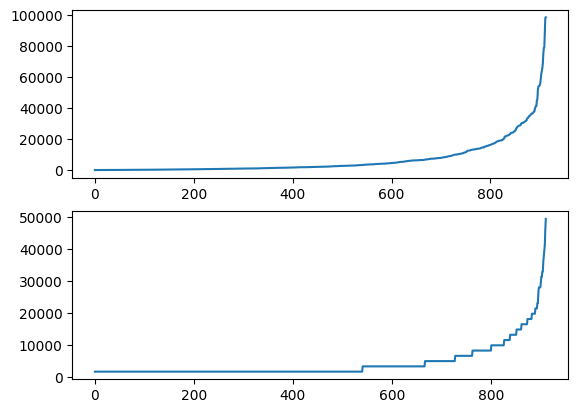

In [113]:
plt.subplot(2,1,1);
plt.plot(flood['gfd_area'].sort_values().reset_index(drop = True));
plt.subplot(2,1,2);
plt.plot(flood['gfd_area_bin'].sort_values().reset_index(drop = True));

### Outlier Removal

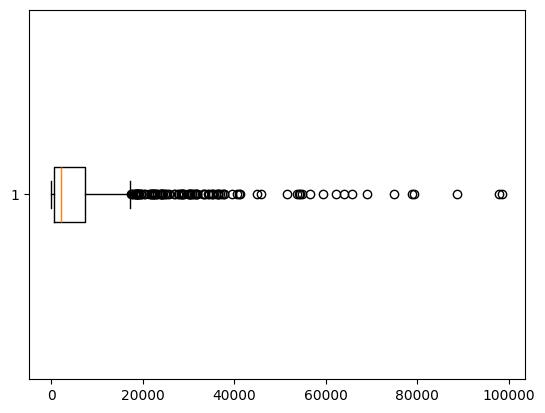

In [114]:
plt.boxplot(flood['gfd_area'],vert=False);

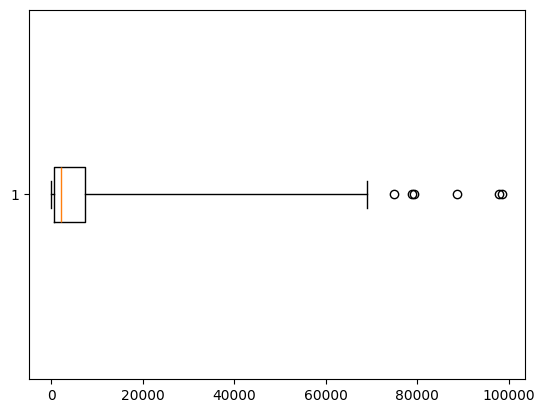

In [115]:
outputbox = plt.boxplot(flood['gfd_area'],vert=False,whis=10);

In [116]:
outputbox

{'whiskers': [<matplotlib.lines.Line2D at 0x7b1d26da21b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b1d26da15e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b1d26da01d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b1d26da0680>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b1d26da2f30>],
 'means': []}

In [117]:
outputbox['whiskers'][1].get_xdata()

array([ 7354.55, 68991.93])

In [118]:
outputbox['whiskers'][0].get_xdata()

array([608.6,   0. ])

In [119]:
outputbox['fliers'][0].get_xdata()

array([98547.62, 79213.43, 75030.8 , 78785.53, 88773.57, 97982.77])

remove outlier

In [120]:
flood_nooutlier = flood[flood['gfd_area']<
                        outputbox['whiskers'][1].get_xdata()[1]]

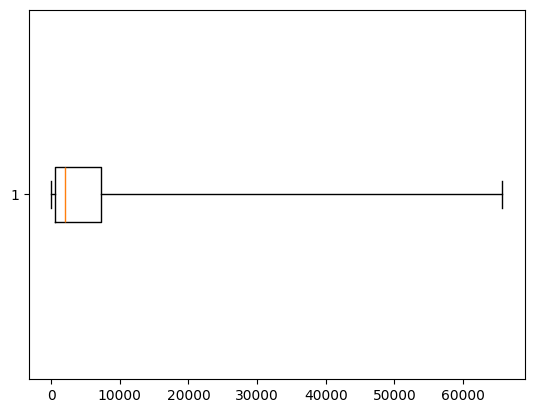

In [121]:
outoutbox2 = plt.boxplot(flood_nooutlier['gfd_area'],vert=False,whis=10);

ตามหาค่า outlier

In [122]:
flood[flood['gfd_area'] == outputbox['whiskers'][0].get_xdata()[0]]

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000,gfd_area_bin
872,DFO_4485_From_20170612_to_20170614,4485,std,NaN,Philippines,NaN,125.249498,7.76344,6/12/17,6/14/17,...,1.0,608.6,359310.0,308601.0,359310,1,50709,0,NaN,1642.460333


# Data Intergration

Data exploration


In [166]:
project_df = pd.read_csv('/content/drive/MyDrive/BSC_data 2026/Copy of opendata_project-2.csv')
project_df.head()

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
0,20809.0,5ec3409884c1860019f3298d,Baan Laksiri Surin-Korco,บ้านหลักศิริ สุรินทร์-คอโค,3,Townhome,ทาวน์โฮม,1490000.0,developer_7326,"LAK SIRI REAL ESTATE CO., LTD.",...,NaN,NaN,1.0,1.0,2020-05-19 09:12:40,NaN,2020-12-04 10:33:10,baania,https://baania.com/th/project/บ้านหลักศิริ-สุร...,2023-06-11
1,4268.0,project_15905,Liberty Park 2,ลิเบอร์ตี้ พาร์ค 2,2,Condo,คอนโด,6500000.0,developer_10510,NaN,...,0.0,0.0,1.0,1.0,2019-06-28 16:06:45,1998-12-31 07:00:00,2020-12-04 10:39:27,baania,https://baania.com/th/project/ลิเบอร์ตี้-พาร์ค...,2023-06-11
2,5849.0,62b2b082cb0d2c0014be01a6,Pleno Paholyothin-Saimai 2,พลีโน่ พหลโยธิน-สายไหม 2,3,Townhome,ทาวน์โฮม,2790000.0,developer_1760,"AP (THAILAND) PUB CO., LTD.",...,1.0,NaN,1.0,1.0,2022-06-22 13:02:42,2024-01-01 07:00:00,2023-03-20 15:00:04,baania,https://baania.com/th/project/พลีโน่-พหลโยธิน-...,2023-06-11
3,21762.0,project_6010,Baan Thara Rin,บ้านธารารินทร์,1,Detached House,บ้าน,3100000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,2017-04-19 14:41:10,NaN,2022-11-07 12:30:02,baania,https://baania.com/th/project/บ้านธารารินทร์-p...,2023-06-11
4,10751.0,project_11312,The Forest Hill,เดอะ ฟอเรสต์ ฮิลล์,1,Detached House,บ้าน,2450000.0,developer_7313,"Cholsiri Property Co., Ltd.",...,1.0,NaN,1.0,1.0,2017-10-30 14:10:50,2018-12-31 07:00:00,2022-08-15 16:00:05,baania,https://baania.com/th/project/เดอะ-ฟอเรสต์-ฮิล...,2023-06-11


In [76]:
for i in project_df.columns:
    print(i)

row_number
unittype_id
project_id
name_th
propertytype_id
propertytype_name_en
propertytype_name_th
area_total_min_wa
area_usable_min
price_min
count_airconditioner
count_elevator
count_floor_internal
count_parking
count_room_bath
count_room_bed
count_room_dinning
count_room_guest
count_room_kitchen
count_room_living
count_room_maid
count_room_storage
count_room_utility
date_created
date_updated
source
url_unittype
day


In [78]:
unit_df = pd.read_csv('/content/drive/MyDrive/BSC_data 2026/Copy of opendata_unittype-2.csv')
unit_df.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:17,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-09-09 15:30:02,2022-09-09 15:03:18,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,1.0,NaN,NaN,NaN,NaN,2022-03-09 16:30:04,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,1.0,1.0,NaN,NaN,NaN,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11


In [79]:
for i in unit_df.columns:
    print(i)

row_number
unittype_id
project_id
name_th
propertytype_id
propertytype_name_en
propertytype_name_th
area_total_min_wa
area_usable_min
price_min
count_airconditioner
count_elevator
count_floor_internal
count_parking
count_room_bath
count_room_bed
count_room_dinning
count_room_guest
count_room_kitchen
count_room_living
count_room_maid
count_room_storage
count_room_utility
date_created
date_updated
source
url_unittype
day


## Add more columns to the table (X-Data intergation)

In [124]:
unit_df = unit_df.merge(
    project_df[[
        'project_id',
        'name_th',
        'developer_name_th',
        'neighborhood_name_th',
        'subdistrict_name_th',
        'district_name_th',
        'province_name_th'
    ]],
    on='project_id',
    how='left'
)


KeyError: "['developer_name_th', 'neighborhood_name_th', 'subdistrict_name_th', 'district_name_th', 'province_name_th'] not in index"

In [125]:
print(project_df.columns)

Index(['row_number', 'unittype_id', 'project_id', 'name_th', 'propertytype_id',
       'propertytype_name_en', 'propertytype_name_th', 'area_total_min_wa',
       'area_usable_min', 'price_min', 'count_airconditioner',
       'count_elevator', 'count_floor_internal', 'count_parking',
       'count_room_bath', 'count_room_bed', 'count_room_dinning',
       'count_room_guest', 'count_room_kitchen', 'count_room_living',
       'count_room_maid', 'count_room_storage', 'count_room_utility',
       'date_created', 'date_updated', 'source', 'url_unittype', 'day'],
      dtype='object')


In [126]:
project_df_unique_id = project_df.drop_duplicates(subset=['project_id'], keep='last')
unit_df['project_name'] = unit_df['project_id'].map(
    project_df_unique_id.set_index('project_id')['name_th']
)

##*Deduplication*

ดูก่อนว่า Data duplicate ยังไง

In [127]:
project_df.duplicated().any()

np.False_

In [128]:
project_df.duplicated().sum()

np.int64(0)

In [129]:
project_df[project_df.duplicated(keep=False)]

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day


In [130]:
project_df.duplicated(subset=['project_id'], keep=False).sum()

np.int64(34126)

In [131]:
project_df[project_df.duplicated(subset=['project_id'], keep=False)].head(20).sort_values(by=['project_id'])

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,2790000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:18:38,2020-06-22 11:03:48,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11
17,41296,5ea143dd38be3400128e35ea,5ea1427f38be3400128e35d9,บ้านเดี่ยวชั้นเดียว TR03,1,Detached House,บ้าน,NaN,NaN,1890000.0,...,1.0,NaN,NaN,NaN,NaN,2021-11-12 13:18:46,2020-06-26 15:29:10,baania,https://baania.com/th/project/เดอะ-ริช-โฮม-หนอ...,2023-06-11
7,41351,5ea2a34a78b3120012dd4d50,5ea2a20578b3120012dd4d48,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,94.00,1990000.0,...,1.0,NaN,NaN,NaN,NaN,2021-11-12 13:18:19,2020-04-24 15:32:20,baania,https://baania.com/th/project/เดอะ-เพอร์เฟค-ทา...,2023-06-11
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,1.0,NaN,NaN,NaN,NaN,2022-03-09 16:30:04,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,1,Detached House,บ้าน,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-11-24 16:00:05,2022-11-24 15:30:21,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,1,Detached House,บ้าน,NaN,215.00,5300000.0,...,1.0,NaN,1.0,1.0,NaN,2021-01-25 11:00:24,2021-01-25 10:46:07,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11
21,32521,unittype_32521,project_13801,ทาวน์โฮมชั้นเดียว,3,Townhome,ทาวน์โฮม,NaN,NaN,890000.0,...,NaN,NaN,NaN,NaN,NaN,2020-12-04 10:38:39,2020-10-14 00:51:25,baania,https://baania.com/th/project/บ้านอิงกมล-บ้านพ...,2023-06-11
20,32791,unittype_33900,project_14527,Relax,20000,Twin house,บ้านแฝด,NaN,120.00,3990000.0,...,NaN,NaN,NaN,NaN,1.0,2022-11-24 14:30:02,2022-11-24 14:27:52,baania,https://baania.com/th/project/คาซ่า-เพรสโต้-ปร...,2023-06-11
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:17,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.00,3700000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11


ลบข้อมูลที่มี project_id ว้ำกัน โดยเก็บไว้เฉพาะตัวที่เป็นข้อมูลล่าสุด(ตัวอย่าง)

In [132]:
project_df_drop = project_df.duplicated(subset=['project_id'], keep='last')

In [133]:
unit_df['ชื่อโครงการ'] = unit_df['project_id'].map(project_df_unique_id.set_index('project_id')['name_th'])

In [134]:
project_df_drop = project_df.drop_duplicates()

## HW3 กลับไปเติมข้อมูล Columns ที่จำเป็นที่เหลือ

In [135]:

cols = {
    'name_th': 'ชื่อโครงการ',
    'developer_name_th': 'ผู้พัฒนา',
    'neighborhood_name_th': 'ย่าน',
    'subdistrict_name_th': 'ตำบล',
    'district_name_th': 'อำเภอ',
    'province_name_th': 'จังหวัด'
}

unit_df = unit_df.drop(columns=list(cols.values()), errors='ignore')

unit_df = unit_df.join(
    project_df_drop.set_index('project_id')[list(cols.keys())].rename(columns=cols),
    on='project_id'
)



KeyError: "['developer_name_th', 'neighborhood_name_th', 'subdistrict_name_th', 'district_name_th', 'province_name_th'] not in index"

## Add more data (Y-Data intergation)

สมมติว่า Database เก็บแยกชนิดของบ้านและคอนโด

In [136]:
house = unit_df[unit_df['propertytype_name_th'] == 'บ้าน']
condo = unit_df[unit_df['propertytype_name_th'] == 'คอนโด']

ฐานข้อมูลบ้าน และ condo

In [137]:
house.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day,project_name
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,1,Detached House,บ้าน,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2022-11-24 16:00:05,2022-11-24 15:30:21,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,Recency
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,NaN,100.0,6500000.0,...,NaN,NaN,NaN,NaN,2022-09-12 13:00:04,2022-09-12 12:38:53,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,บ้านเดี่ยวสองชั้น
10,12753,unittype_24670,project_9840,วนิดา,1,Detached House,บ้าน,NaN,203.0,4600000.0,...,NaN,NaN,1.0,NaN,2022-08-17 15:00:06,2022-08-17 14:58:24,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,นดา
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,2790000.0,...,NaN,NaN,NaN,NaN,2021-11-12 13:18:38,2020-06-22 11:03:48,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,ทาวน์โฮมสองชั้น
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,1,Detached House,บ้าน,NaN,215.0,5300000.0,...,NaN,1.0,1.0,NaN,2021-01-25 11:00:24,2021-01-25 10:46:07,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บ้านธนภูมิ H


In [138]:
house.shape

(17777, 29)

In [139]:
condo.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day,project_name
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.00,3700000.0,...,NaN,NaN,NaN,NaN,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,1 Bedroom
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.00,4200000.0,...,1.0,NaN,NaN,NaN,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,1 Bedroom
8,33884,unittype_36928,project_15818,1 Bedroom,2,Condo,คอนโด,NaN,49.00,3350000.0,...,NaN,NaN,NaN,NaN,2021-11-12 13:22:58,2020-10-14 20:24:11,baania,https://baania.com/th/project/ทองหล่อ-ทาวเวอร์...,2023-06-11,2 Bedroom
14,34574,unittype_37590,project_16368,4 Bedroom,2,Condo,คอนโด,NaN,170.00,15900000.0,...,NaN,NaN,NaN,NaN,2021-11-12 13:23:00,2020-10-14 20:27:19,baania,https://baania.com/th/project/จิวเวลรี่-เทรด-เ...,2023-06-11,1 Bedroom
16,39469,unittype_40049,project_17461,2 Bedroom,2,Condo,คอนโด,NaN,48.88,4700000.0,...,NaN,NaN,NaN,NaN,2023-05-11 16:00:05,2023-05-11 15:30:26,baania,https://baania.com/th/project/อะไรส์-รัชดา-19-...,2023-06-11,1 Bedroom Plus


In [86]:
condo.shape

(12806, 28)

## Data Transformation

ในกรณีที่ต่าง column ต่างหน่วย ต้องแปลงข้อมูลก่อน

In [140]:
project_df_drop

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:17,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-09-09 15:30:02,2022-09-09 15:03:18,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,1.0,NaN,NaN,NaN,NaN,2022-03-09 16:30:04,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,1.0,1.0,NaN,NaN,NaN,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43369,9507,unittype_5086,project_1635,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,880000.0,...,1.0,NaN,NaN,NaN,NaN,2022-10-19 11:30:05,2022-10-19 11:17:08,baania,https://baania.com/th/project/บ้านคุรุสภา-นครร...,2023-06-11
43370,23721,unittype_15644,project_6109,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,45.0,140.0,2400000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:24:19,2020-10-14 23:03:19,baania,https://baania.com/th/project/บ้านเต็มสิริ-1-6...,2023-06-11
43371,31551,unittype_21385,project_8392,อาคารพาณิชย์สี่ชั้น type B,4,Commercial,อาคารพาณิชย์,34.0,192.0,13000000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:19:31,2020-10-14 00:38:09,baania,https://baania.com/th/project/พระเงิน-เพลส-839...,2023-06-11
43372,29837,unittype_26243,project_10566,ทาวน์โฮมสามชั้น,3,Townhome,ทาวน์โฮม,NaN,191.0,2600000.0,...,NaN,1.0,NaN,NaN,NaN,2020-12-04 10:47:10,2020-10-16 16:33:56,baania,https://baania.com/th/project/บ้านไทยวิลล่า-ศร...,2023-06-11


In [141]:
house['price_min'] = house['price_min']/1000000
house

/tmp/ipython-input-3989735810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['price_min'] = house['price_min']/1000000


,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day,project_name
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,1,Detached House,บ้าน,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2022-11-24 16:00:05,2022-11-24 15:30:21,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,Recency
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,NaN,100.0,6.5000,...,NaN,NaN,NaN,NaN,2022-09-12 13:00:04,2022-09-12 12:38:53,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,บ้านเดี่ยวสองชั้น
10,12753,unittype_24670,project_9840,วนิดา,1,Detached House,บ้าน,NaN,203.0,4.6000,...,NaN,NaN,1.0,NaN,2022-08-17 15:00:06,2022-08-17 14:58:24,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,นดา
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,2.7900,...,NaN,NaN,NaN,NaN,2021-11-12 13:18:38,2020-06-22 11:03:48,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,ทาวน์โฮมสองชั้น
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,1,Detached House,บ้าน,NaN,215.0,5.3000,...,NaN,1.0,1.0,NaN,2021-01-25 11:00:24,2021-01-25 10:46:07,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บ้านธนภูมิ H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43361,2451,unittype_13544,project_5287,บ้านเดี่ยวสองชั้น Type B,1,Detached House,บ้าน,NaN,160.0,3.2000,...,1.0,NaN,NaN,NaN,2020-12-04 10:38:02,2020-10-14 00:47:42,baania,https://baania.com/th/project/บ้านณัฐชากรีนวิล...,2023-06-11,บ้านเดี่ยวสองชั้น Type B
43363,1055,unittype_5786,project_1886,กฤษณา PLUS-EV89,1,Detached House,บ้าน,2.0,170.0,3.8614,...,NaN,NaN,NaN,NaN,2021-11-12 13:24:08,2020-10-14 22:26:15,baania,https://baania.com/th/project/กลันตา-พลัส-อีโค...,2023-06-11,กฤษณา PLUS-EV89
43367,20108,630dc1c8713e23001a6a6bb1,630dc0f7713e23001a6a6ba9,Type A,1,Detached House,บ้าน,NaN,186.0,5.3900,...,NaN,NaN,NaN,NaN,2023-03-28 15:00:05,2023-03-28 14:50:41,baania,https://baania.com/th/project/ชวนชม-5-630dc0f7...,2023-06-11,Type A
43369,9507,unittype_5086,project_1635,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,0.8800,...,NaN,NaN,NaN,NaN,2022-10-19 11:30:05,2022-10-19 11:17:08,baania,https://baania.com/th/project/บ้านคุรุสภา-นครร...,2023-06-11,บ้านเดี่ยวชั้นเดียว


ตรวจสอบ scale คราวๆ

In [142]:
from matplotlib import pyplot as plt

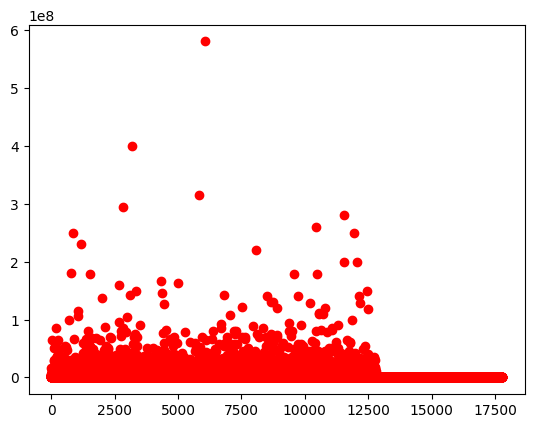

In [143]:
plt.scatter(range(len(condo['price_min'])),condo['price_min'],c='r')
plt.scatter(range(len(house['price_min'])),house['price_min'],c='r')

แปลงค่าหน่วยคอนโดหลักล้านแล้วรวม data

/tmp/ipython-input-2789928146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condo['price_min'] = condo['price_min']/1000000


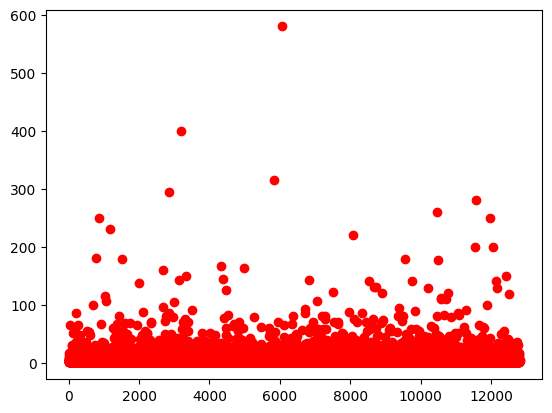

In [144]:
condo['price_min'] = condo['price_min']/1000000
condo_house = pd.concat([house,condo])
plt.scatter(range(len(condo['price_min'])),condo['price_min'],c='r');

In [145]:
condo_house[condo_house['price_min'] > 300]

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day,project_name
30469,21591,63f6e58e9b028e00130ae6f6,63f6e3b09b028e00130ae6e5,บ้านเดี่ยวสามชั้น,1,Detached House,บ้าน,NaN,2918.00,385.0,...,NaN,NaN,NaN,NaN,2023-02-23 11:30:03,2023-02-23 11:05:42,baania,https://baania.com/th/project/อสงไขย-63f6e3b09...,2023-06-11,บ้านเดี่ยวสามชั้น
11071,11195,unittype_36249,project_15531,Penthouse,2,Condo,คอนโด,NaN,844.56,400.0,...,3.0,1.0,NaN,NaN,2023-05-27 07:30:02,2023-05-27 07:19:29,baania,https://baania.com/th/project/บันยัน-ทรี-เรสซิ...,2023-06-11,3 Bedroom
19928,4397,unittype_7639,project_2540,Penthouse,2,Condo,คอนโด,NaN,1050.00,315.0,...,NaN,NaN,NaN,NaN,2021-11-12 13:20:45,2020-10-14 00:56:43,baania,https://baania.com/th/project/โฟร์ซีซั่นส์-ไพร...,2023-06-11,2 Bedroom
20668,34097,unittype_37324,project_16305,Penthouse,2,Condo,คอนโด,NaN,1182.00,580.0,...,NaN,NaN,NaN,NaN,2021-11-12 13:20:31,2020-10-14 00:55:50,baania,https://baania.com/th/project/เดอะ-สุโขทัย-เรส...,2023-06-11,2 Bedroom


## Column Alignment

สลับ column ของ data condo

In [146]:
columns_title = ['row_number', 'unittype_id', 'project_id', 'name_th_x',
       'propertytype_id', 'propertytype_name_en', 'propertytype_name_th',
       'area_total_min_wa', 'area_usable_min', 'price_min',
       'count_airconditioner', 'count_elevator', 'count_floor_internal',
       'count_parking', 'count_room_bath', 'count_room_bed',
       'count_room_dinning', 'count_room_guest', 'count_room_kitchen',
       'count_room_living', 'count_room_maid', 'count_room_storage',
       'count_room_utility', 'date_created', 'date_updated', 'source',
       'url_unittype', 'day', 'name_th_y', 'developer_name_th',
       'neighborhood_name_th', 'subdistrict_name_th', 'district_name_th',
       'province_name_th', 'project_name', 'ชื่อโครงการ', 'ผู้พัฒนา', 'ย่าน',
       'ตำบล', 'อำเภอ', 'จังหวัด']

In [147]:
condo_swap = condo.reindex(columns=columns_title)

In [148]:
condo_swap.head()


,row_number,unittype_id,project_id,name_th_x,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,subdistrict_name_th,district_name_th,province_name_th,project_name,ชื่อโครงการ,ผู้พัฒนา,ย่าน,ตำบล,อำเภอ,จังหวัด
0,37586,unittype_35602,project_15270,NaN,2,Condo,คอนโด,NaN,30.00,3.70,...,NaN,NaN,NaN,1 Bedroom,NaN,NaN,NaN,NaN,NaN,NaN
4,10907,unittype_8344,project_2821,NaN,2,Condo,คอนโด,NaN,48.00,4.20,...,NaN,NaN,NaN,1 Bedroom,NaN,NaN,NaN,NaN,NaN,NaN
8,33884,unittype_36928,project_15818,NaN,2,Condo,คอนโด,NaN,49.00,3.35,...,NaN,NaN,NaN,2 Bedroom,NaN,NaN,NaN,NaN,NaN,NaN
14,34574,unittype_37590,project_16368,NaN,2,Condo,คอนโด,NaN,170.00,15.90,...,NaN,NaN,NaN,1 Bedroom,NaN,NaN,NaN,NaN,NaN,NaN
16,39469,unittype_40049,project_17461,NaN,2,Condo,คอนโด,NaN,48.88,4.70,...,NaN,NaN,NaN,1 Bedroom Plus,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
condo.columns

Index(['row_number', 'unittype_id', 'project_id', 'name_th', 'propertytype_id',
       'propertytype_name_en', 'propertytype_name_th', 'area_total_min_wa',
       'area_usable_min', 'price_min', 'count_airconditioner',
       'count_elevator', 'count_floor_internal', 'count_parking',
       'count_room_bath', 'count_room_bed', 'count_room_dinning',
       'count_room_guest', 'count_room_kitchen', 'count_room_living',
       'count_room_maid', 'count_room_storage', 'count_room_utility',
       'date_created', 'date_updated', 'source', 'url_unittype', 'day',
       'project_name'],
      dtype='object')

In [150]:
condoswap_house = pd.concat([condo_swap,house])

In [151]:
condoswap_house.head()

,row_number,unittype_id,project_id,name_th_x,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,district_name_th,province_name_th,project_name,ชื่อโครงการ,ผู้พัฒนา,ย่าน,ตำบล,อำเภอ,จังหวัด,name_th
0,37586,unittype_35602,project_15270,NaN,2,Condo,คอนโด,NaN,30.00,3.70,...,NaN,NaN,1 Bedroom,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10907,unittype_8344,project_2821,NaN,2,Condo,คอนโด,NaN,48.00,4.20,...,NaN,NaN,1 Bedroom,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,33884,unittype_36928,project_15818,NaN,2,Condo,คอนโด,NaN,49.00,3.35,...,NaN,NaN,2 Bedroom,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,34574,unittype_37590,project_16368,NaN,2,Condo,คอนโด,NaN,170.00,15.90,...,NaN,NaN,1 Bedroom,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,39469,unittype_40049,project_17461,NaN,2,Condo,คอนโด,NaN,48.88,4.70,...,NaN,NaN,1 Bedroom Plus,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
condoswap_house.tail()

,row_number,unittype_id,project_id,name_th_x,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,district_name_th,province_name_th,project_name,ชื่อโครงการ,ผู้พัฒนา,ย่าน,ตำบล,อำเภอ,จังหวัด,name_th
43361,2451,unittype_13544,project_5287,NaN,1,Detached House,บ้าน,NaN,160.0,3.2000,...,NaN,NaN,บ้านเดี่ยวสองชั้น Type B,NaN,NaN,NaN,NaN,NaN,NaN,บ้านเดี่ยวสองชั้น Type B
43363,1055,unittype_5786,project_1886,NaN,1,Detached House,บ้าน,2.0,170.0,3.8614,...,NaN,NaN,กฤษณา PLUS-EV89,NaN,NaN,NaN,NaN,NaN,NaN,กฤษณา PLUS-EV89
43367,20108,630dc1c8713e23001a6a6bb1,630dc0f7713e23001a6a6ba9,NaN,1,Detached House,บ้าน,NaN,186.0,5.3900,...,NaN,NaN,Type A,NaN,NaN,NaN,NaN,NaN,NaN,Type A
43369,9507,unittype_5086,project_1635,NaN,1,Detached House,บ้าน,NaN,NaN,0.8800,...,NaN,NaN,บ้านเดี่ยวชั้นเดียว,NaN,NaN,NaN,NaN,NaN,NaN,บ้านเดี่ยวชั้นเดียว
43370,23721,unittype_15644,project_6109,NaN,1,Detached House,บ้าน,45.0,140.0,2.4000,...,NaN,NaN,บ้านเดี่ยวสองชั้น,NaN,NaN,NaN,NaN,NaN,NaN,บ้านเดี่ยวสองชั้น


## Add Data Source Column

In [153]:
house=house.drop(columns=['propertytype_id','propertytype_name_en','propertytype_name_th'])
condo=condo.drop(columns=['propertytype_id','propertytype_name_en','propertytype_name_th'])

In [154]:
condo.head()

,row_number,unittype_id,project_id,name_th,area_total_min_wa,area_usable_min,price_min,count_airconditioner,count_elevator,count_floor_internal,...,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day,project_name
0,37586,unittype_35602,project_15270,Studio,NaN,30.00,3.70,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,1 Bedroom
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),NaN,48.00,4.20,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,1 Bedroom
8,33884,unittype_36928,project_15818,1 Bedroom,NaN,49.00,3.35,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2021-11-12 13:22:58,2020-10-14 20:24:11,baania,https://baania.com/th/project/ทองหล่อ-ทาวเวอร์...,2023-06-11,2 Bedroom
14,34574,unittype_37590,project_16368,4 Bedroom,NaN,170.00,15.90,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2021-11-12 13:23:00,2020-10-14 20:27:19,baania,https://baania.com/th/project/จิวเวลรี่-เทรด-เ...,2023-06-11,1 Bedroom
16,39469,unittype_40049,project_17461,2 Bedroom,NaN,48.88,4.70,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2023-05-11 16:00:05,2023-05-11 15:30:26,baania,https://baania.com/th/project/อะไรส์-รัชดา-19-...,2023-06-11,1 Bedroom Plus


In [155]:
house['data_source'] = 'house'
condo['data_source'] = 'condo'
condo_house_data_source = pd.concat([house,condo])

In [156]:
condo_house_data_source

,row_number,unittype_id,project_id,name_th,area_total_min_wa,area_usable_min,price_min,count_airconditioner,count_elevator,count_floor_internal,...,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day,project_name,data_source
6,20789,637f2b9413f8b50012598d87,637f2adf13f8b50012598d82,Repose,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,2022-11-24 16:00:05,2022-11-24 15:30:21,baania,https://baania.com/th/project/เพอร์เฟค-มาสเตอร...,2023-06-11,Recency,house
9,19169,623add41c74d8800148716b0,623ad6bac74d8800148716ab,บ้านเดี่ยวสองชั้น,NaN,100.0,6.50,NaN,NaN,2.0,...,NaN,NaN,NaN,2022-09-12 13:00:04,2022-09-12 12:38:53,baania,https://baania.com/th/project/พนาสนธิ์-การ์เด้...,2023-06-11,บ้านเดี่ยวสองชั้น,house
10,12753,unittype_24670,project_9840,วนิดา,NaN,203.0,4.60,NaN,NaN,2.0,...,NaN,1.0,NaN,2022-08-17 15:00:06,2022-08-17 14:58:24,baania,https://baania.com/th/project/เพลินวิว-ทิวเขา-...,2023-06-11,นดา,house
11,41256,5e9feefe38be3400128e3368,5e9fedf838be3400128e335d,บ้านเดี่ยวชั้นเดียว,NaN,NaN,2.79,NaN,NaN,1.0,...,NaN,NaN,NaN,2021-11-12 13:18:38,2020-06-22 11:03:48,baania,https://baania.com/th/project/พราวเรสซิเดนซ์-บ...,2023-06-11,ทาวน์โฮมสองชั้น,house
13,29307,unittype_26473,project_10660,บ้านธนวันต์ G,NaN,215.0,5.30,NaN,NaN,2.0,...,1.0,1.0,NaN,2021-01-25 11:00:24,2021-01-25 10:46:07,baania,https://baania.com/th/project/บางแสน-มหานคร-10...,2023-06-11,บ้านธนภูมิ H,house
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43355,17263,60488b2e582962001402e663,60488aeca8b9ee0013d7ebac,1 Bedroom,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2021-03-10 16:30:04,2021-03-10 16:07:33,baania,https://baania.com/th/project/เดอะ-ไพรเวซี่-พา...,2023-06-11,1 Bedroom,condo
43357,32766,unittype_32126,project_13619,1 Bedroom,NaN,31.0,6.50,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-05-17 15:30:05,2022-05-17 15:17:54,baania,https://baania.com/th/project/วาลเด้น-อโศก-136...,2023-06-11,1 Bedroom,condo
43364,12599,unittype_24778,project_9877,2 Bedroom,NaN,49.0,3.50,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-08-18 15:00:06,2022-08-18 14:44:59,baania,https://baania.com/th/project/ซีซี-คอนโดมิเนีย...,2023-06-11,2 Bedroom,condo
43366,11147,unittype_35831,project_15356,Studio,NaN,27.0,4.99,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-09-22 15:00:06,2022-09-22 14:56:47,baania,https://baania.com/th/project/ไอดีโอ-โมบิ-รางน...,2023-06-11,Studio,condo


## PCA(X-axis feature)

## Sampling (Y-axis data)

- balanced data(class $\hat y$ blanced)

In [167]:
project_df.head()

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
0,20809.0,5ec3409884c1860019f3298d,Baan Laksiri Surin-Korco,บ้านหลักศิริ สุรินทร์-คอโค,3,Townhome,ทาวน์โฮม,1490000.0,developer_7326,"LAK SIRI REAL ESTATE CO., LTD.",...,NaN,NaN,1.0,1.0,2020-05-19 09:12:40,NaN,2020-12-04 10:33:10,baania,https://baania.com/th/project/บ้านหลักศิริ-สุร...,2023-06-11
1,4268.0,project_15905,Liberty Park 2,ลิเบอร์ตี้ พาร์ค 2,2,Condo,คอนโด,6500000.0,developer_10510,NaN,...,0.0,0.0,1.0,1.0,2019-06-28 16:06:45,1998-12-31 07:00:00,2020-12-04 10:39:27,baania,https://baania.com/th/project/ลิเบอร์ตี้-พาร์ค...,2023-06-11
2,5849.0,62b2b082cb0d2c0014be01a6,Pleno Paholyothin-Saimai 2,พลีโน่ พหลโยธิน-สายไหม 2,3,Townhome,ทาวน์โฮม,2790000.0,developer_1760,"AP (THAILAND) PUB CO., LTD.",...,1.0,NaN,1.0,1.0,2022-06-22 13:02:42,2024-01-01 07:00:00,2023-03-20 15:00:04,baania,https://baania.com/th/project/พลีโน่-พหลโยธิน-...,2023-06-11
3,21762.0,project_6010,Baan Thara Rin,บ้านธารารินทร์,1,Detached House,บ้าน,3100000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,2017-04-19 14:41:10,NaN,2022-11-07 12:30:02,baania,https://baania.com/th/project/บ้านธารารินทร์-p...,2023-06-11
4,10751.0,project_11312,The Forest Hill,เดอะ ฟอเรสต์ ฮิลล์,1,Detached House,บ้าน,2450000.0,developer_7313,"Cholsiri Property Co., Ltd.",...,1.0,NaN,1.0,1.0,2017-10-30 14:10:50,2018-12-31 07:00:00,2022-08-15 16:00:05,baania,https://baania.com/th/project/เดอะ-ฟอเรสต์-ฮิล...,2023-06-11


### เราจะสร้างmodel ทำนายว่าข้อมูลที่ให้มาเป็น propertytype แบบไหน (บ้านหรือคอนโด)

In [168]:
home = project_df[project_df['propertytype_name_th'] == 'บ้าน']

In [169]:
condo = project_df[project_df['propertytype_name_th'] == 'คอนโด']

In [170]:
print(f'home: {home.shape}\n condon: {condo.shape}')

home: (8859, 46)
 condon: (4796, 46)


### เราต้องการ data ที่ balance เพื่อสอน model ที่มีประสิทธิภาพ

เลือก home มาแค่ 4,769 rows

In [200]:
home.sample(random_state=6)

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
6802,23208.0,project_12666,Kunapat 1,บ้านคุณาภัทร 1,1,Detached House,บ้าน,2650000.0,developer_5663,NaN,...,0.0,0.0,0.0,1.0,2017-12-20 09:14:14,NaN,2020-12-04 10:43:56,baania,https://baania.com/th/project/บ้านคุณาภัทร-1-p...,2023-06-11


### สุ่ม data มาตามสัดส่วนที่ต้องการ

In [201]:
home.sample(frac=0.5, random_state=6).shape

(4430, 46)

สุ่มแบบหยิบคืน (Replace=True)

In [202]:
from os import replace
home.sample(n = 10, random_state=6, replace=True)

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
7293,15880.0,624b087faae18f0013406c8e,Sanransiri Ramkhamhaeng,สราญสิริ รามคำแหง,1,Detached House,บ้าน,7000000.0,developer_36,"SANSIRI PUB CO., LTD.",...,1.0,NaN,1.0,1.0,2022-04-04 22:02:23,NaN,2023-03-09 16:53:12,baania,https://baania.com/th/project/สราญสิริ-รามคำแห...,2023-06-11
22634,7550.0,project_10503,World Villa,เวิลด์วิลล่า,1,Detached House,บ้าน,7500000.0,developer_6811,"World Estate Development Co.,Ltd.",...,NaN,1.0,1.0,NaN,2017-10-04 15:45:29,NaN,2020-12-04 10:46:30,baania,https://baania.com/th/project/เวิลด์วิลล่า-pro...,2023-06-11
12568,17152.0,project_15437,Phanpraugsa Phase 2,พรรณพฤกษา เฟส 2,1,Detached House,บ้าน,3990000.0,developer_8911,NaN,...,1.0,1.0,0.0,1.0,2019-04-29 13:48:39,2019-12-31 07:00:00,2020-12-04 10:31:19,baania,https://baania.com/th/project/พรรณพฤกษา-เฟส-2-...,2023-06-11
22958,12445.0,646de96c5aa9150013a9a9e1,Phanason Resort (Laemhin),พนาสนธิ์ รีสอร์ท (แหลมหิน),1,Detached House,บ้าน,7500000.0,developer_2300,"PHANASON GROUP CO., LTD.",...,NaN,NaN,NaN,1.0,2023-05-24 17:39:40,2014-01-01 07:00:00,2023-05-24 18:00:05,baania,https://baania.com/th/project/พนาสนธิ์-รีสอร์ท...,2023-06-11
17333,10029.0,project_7510,Baan Arpakorn 3,บ้านอาภากร 3,1,Detached House,บ้าน,3990000.0,developer_5206,NaN,...,1.0,NaN,NaN,1.0,2017-05-29 15:47:28,2012-12-31 07:00:00,2020-12-04 10:37:42,baania,https://baania.com/th/project/บ้านอาภากร-3-pro...,2023-06-11
14378,16412.0,project_11938,The Enter Together,ดิ เอ็นเทอร์ ทูเก็ตเทอร์,1,Detached House,บ้าน,2000000.0,developer_5971,"Kanlapaphruek Development Co., Ltd.",...,NaN,NaN,NaN,1.0,2017-11-28 13:37:06,2012-03-31 07:00:00,2020-12-04 10:42:04,baania,https://baania.com/th/project/ดิ-เอ็นเทอร์-ทูเ...,2023-06-11
19451,4742.0,project_426,Preukpirom,พฤกษ์ภิรมย์,1,Detached House,บ้าน,1209000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,2015-10-15 11:32:24,NaN,2020-12-04 10:36:42,baania,https://baania.com/th/project/พฤกษ์ภิรมย์-proj...,2023-06-11
11000,10335.0,project_2007,Baan Rungnirun 4,บ้านรุ่งนิรันดร์ โครงการ 4,1,Detached House,บ้าน,850000.0,developer_1362,NaN,...,NaN,NaN,NaN,NaN,2016-09-02 16:42:11,NaN,2020-12-04 10:45:31,baania,https://baania.com/th/project/บ้านรุ่งนิรันดร์...,2023-06-11
6707,3676.0,project_15755,Baan Suk Chai Villeage,บ้านสุขใจ วิลเลจ,1,Detached House,บ้าน,3200000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,2019-06-27 10:53:37,NaN,2020-12-04 10:42:23,baania,https://baania.com/th/project/บ้านสุขใจ-วิลเลจ...,2023-06-11
6291,7652.0,project_6275,Passorn 3 Rangsit Klong 3,ภัสสร 3 รังสิต คลอง 3,1,Detached House,บ้าน,3100000.0,developer_10510,NaN,...,1.0,1.0,1.0,1.0,2017-04-25 17:23:56,NaN,2020-12-04 10:37:04,baania,https://baania.com/th/project/ภัสสร-3-รังสิต-ค...,2023-06-11


### สุ่มแบบ over-sampling

In [204]:
condo.sample(n=8859, replace=True, random_state=6)

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
13942,5579.0,project_2687,The Plenary Sathorn,เดอะ เพลนเนอรี่ สาทร,2,Condo,คอนโด,2490000.0,developer_1785,GENERAL ENVIRONMENTAL CONSERVATION PUBLIC COMP...,...,NaN,NaN,1.0,1.0,2016-11-23 14:48:42,2015-12-31 07:00:00,2022-10-07 21:00:05,baania,https://baania.com/th/project/เดอะ-เพลนเนอรี่-...,2023-06-11
1385,19608.0,project_2611,The Teak Phattanakarn-Thonglor,เดอะ ทีค พัฒนาการ-ทองหล่อ,2,Condo,คอนโด,2790000.0,developer_1997,NaN,...,1.0,NaN,1.0,1.0,2016-11-21 10:35:58,2016-06-30 07:00:00,2020-12-04 10:48:26,baania,https://baania.com/th/project/เดอะ-ทีค-พัฒนากา...,2023-06-11
10074,1542.0,project_17062,Quintara Treehaus Sukhumvit 42,ควินทารา ทรีเฮาส์ สุขุมวิท 42,2,Condo,คอนโด,4090000.0,developer_2008,NaN,...,1.0,1.0,1.0,1.0,2019-12-02 10:18:07,2020-04-30 07:00:00,2021-01-08 11:30:05,baania,https://baania.com/th/project/ควินทารา-ทรีเฮาส...,2023-06-11
23489,13352.0,project_4205,Phat Condominium,ภัทรคอนโดมิเนียม,2,Condo,คอนโด,313000.0,developer_10510,NaN,...,NaN,NaN,NaN,1.0,2017-02-27 09:14:35,NaN,2020-12-04 10:40:11,baania,https://baania.com/th/project/ภัทรคอนโดมิเนียม...,2023-06-11
1913,13681.0,project_3464,Zelle Salaya,เซล ศาลายา,2,Condo,คอนโด,1790000.0,developer_1762,"PRINSIRI PUB CO., LTD.",...,1.0,1.0,1.0,1.0,2017-01-23 08:46:55,2019-12-31 07:00:00,2023-04-24 16:00:05,baania,https://baania.com/th/project/เซล-ศาลายา-proje...,2023-06-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19527,7160.0,project_3008,Blossom Condo @Fashion Altitude,บลอสซั่ม คอนโด แอท แฟชั่น อัลติจูด,2,Condo,คอนโด,2000000.0,developer_1960,"SIAMESE ASSET PUB CO., LTD.",...,1.0,NaN,1.0,1.0,2016-12-08 14:56:28,2017-12-31 07:00:00,2023-04-20 16:30:02,baania,https://baania.com/th/project/บลอสซั่ม-คอนโด-แ...,2023-06-11
6930,3364.0,project_14814,Baan Nub Kluen,บ้านนับคลื่น,2,Condo,คอนโด,3900000.0,developer_36,"SANSIRI PUB CO., LTD.",...,1.0,NaN,1.0,1.0,2018-10-08 09:05:03,2009-12-31 07:00:00,2020-12-04 10:41:44,baania,https://baania.com/th/project/บ้านนับคลื่น-pro...,2023-06-11
12093,1706.0,project_6248,The Excel Bearing,ดิเอ็กซ์เซล แบริ่ง,2,Condo,คอนโด,1490000.0,developer_2012,"All Inspire Development Pub Co., Ltd.",...,NaN,NaN,1.0,1.0,2017-04-25 11:43:24,2015-12-31 07:00:00,2021-03-18 15:30:05,baania,https://baania.com/th/project/ดิเอ็กซ์เซล-แบริ...,2023-06-11
16803,20179.0,project_969,NHA Chiang Mai (Night Safari),บ้านเอื้ออาทรจังหวัดเชียงใหม่ (ไนท์ซาฟารี),2,Condo,คอนโด,630000.0,developer_9533,NATIONAL HOUSING AUTHORITY,...,NaN,1.0,NaN,1.0,2015-11-05 13:24:04,NaN,2020-12-04 10:41:21,baania,https://baania.com/th/project/บ้านเอื้ออาทรจัง...,2023-06-11
